In [187]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy
import seaborn as sns
import pandas as pd
import math
from scipy import stats
from math import sqrt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy import random, linalg
from random import randrange, uniform
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from IPython.display import Image
import scipy.integrate
%matplotlib inline
import numpy.random as npr

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [188]:
# filling the NumPy array 

mean = 0  
std = 0.1 
size = 100
x = np.random.normal(loc = mean, scale = std, size = size)
bins = 20
bin_width = std / 2

<ipython-input-192-7c1fbaa38672>:7: RuntimeWarning: divide by zero encountered in true_divide
  error = 1/np.sqrt(h)  # computing poisson uncertainties


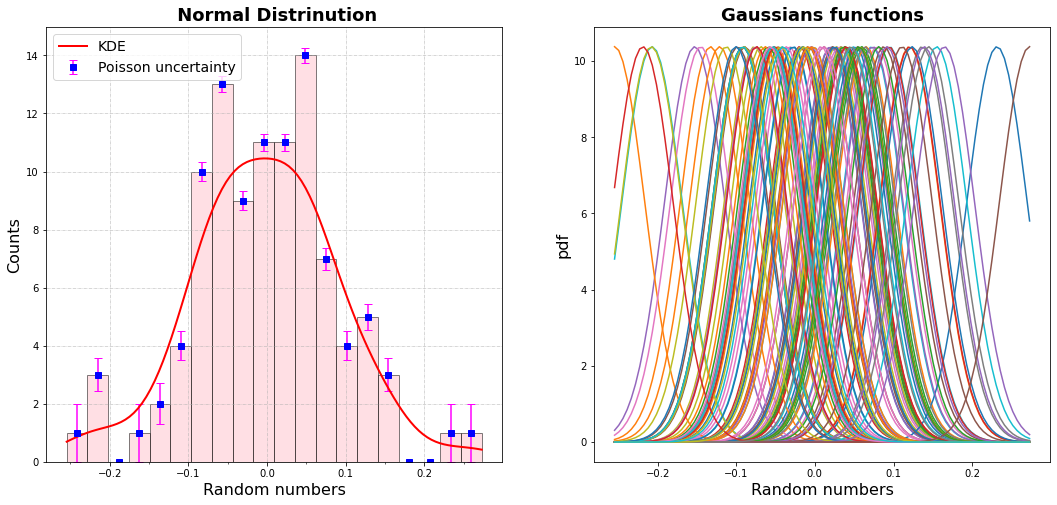

In [192]:
# filling the histogram

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18,8))

h, bins, _ = ax1.hist(x, bins, alpha = 0.5, color = 'pink', edgecolor = 'black')
bins_centers = (bins[:-1] + bins[1:]) / 2
error = 1/np.sqrt(h)  # computing poisson uncertainties

ax1.set_xlabel('Random numbers', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax1.set_title(' Normal Distrinution', fontsize = 18, fontweight = 'bold')
ax1.xaxis.set_minor_locator(MultipleLocator(bin_width))
ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.errorbar(x = bins_centers, y = h, yerr = error, fmt ='s', color = 'blue',  ecolor = 'magenta', capsize = 4, label = 'Poisson uncertainty')
ax1.legend(fontsize = 10)
ax1.grid(linestyle = 'dashdot', linewidth = 0.5)


# creating the gaussians and plotting all the gaussians

gaussian=[]
grid = np.linspace(x.min(), x.max(), size) # return N points evenly-spaced
    
for item in x:
    std = 1.06*x.std()*x.size**(-0.2)
    gauss = norm.pdf(grid, item, std) # gauss of N-points, mean=item, std=stddev
    gaussian.append(gauss)
    ax2.plot(grid, gauss)
    ax2.set_title('Gaussians functions', fontsize = 18, fontweight = 'bold')
    ax2.set_xlabel('Random numbers', fontsize = 16)
    ax2.set_ylabel('pdf', fontsize = 16)
    

# Gaussian sum and normalization and plotting KDE

gaussian_sum = np.sum(gaussian, axis = 0)
gaussian_norm = np.trapz(np.sum(gaussian,axis=0),grid)/np.trapz(y, x = center_bins)
normalized_sum = gaussian_sum/gaussian_norm 
ax1.plot(grid, normalized_sum, label = 'KDE', color = 'red', linewidth = 2)
ax1.legend(fontsize = 14)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

'wget' is not recognized as an internal or external command,
operable program or batch file.


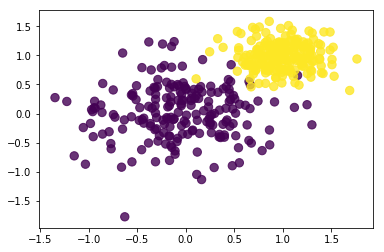

In [193]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [194]:
# writing the function that generates the 2D dataset

def dataset_2D(mean, std, sample):
    x1, y1 = np.random.multivariate_normal(mean[0], std[0], sample).T
    x2, y2 = np.random.multivariate_normal(mean[1], std[1], sample).T
    return  x1, y1, x2, y2

mean = ([4, 1], [0, 3])  # number of categories (>= 2)
std = ([[5, 2], [1, 0]], [[6, 3], [7, 0]])
sample = 700  # number of samples for each category

x1, y1, x2, y2 = data_gen(mean, std, sample)

<ipython-input-10-290c63744c05>:2: RuntimeWarning: covariance is not positive-semidefinite.
  A_1, B_1 = np.random.multivariate_normal(mean[0], covariance[0], sample).T
<ipython-input-10-290c63744c05>:3: RuntimeWarning: covariance is not positive-semidefinite.
  A_2, B_2 = np.random.multivariate_normal(mean[1], covariance[1], sample).T


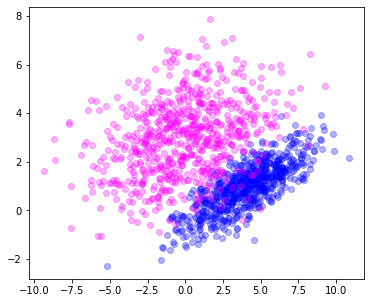

In [195]:
# displaying the 2D dataset in a scatter plot

fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111)
ax.scatter( x1, y1, color = 'blue', alpha = 0.3)
ax.scatter(x2, y2, color = 'magenta', alpha = 0.3)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [196]:
# importting the dataset

dataset = np.load('residuals_261.npy', allow_pickle = 'true')

data_frame = pd.DataFrame(dataset.item())

print ('\nThe DataFrame is:\n')
display(data_frame)

# cleaning the dataset

cleaned_dataframe = data_frame[data_frame['residuals'].abs() < 2]

print ('\nThe Cleaned DataFrame is:\n')
display(cleaned_dataframe)


The DataFrame is:



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1



The Cleaned DataFrame is:



,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


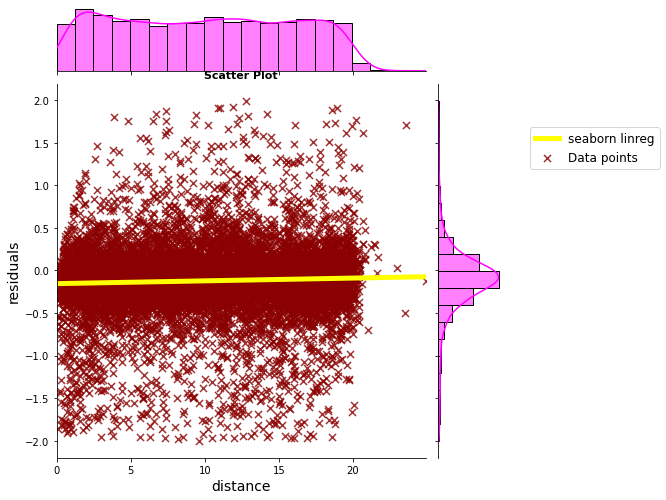

In [197]:
# plotting a seaborn jointplot of 'residuals' versus 'distances', having seaborn performing a linear regression

bins = 20
g = sns.jointplot(data = cleaned_dataframe , x = 'distances', y = 'residuals', kind = 'reg', joint_kws = {'line_kws':{'color':'yellow', 'label':'seaborn linreg', 'linewidth':5}}, height = 7,
                   scatter_kws = {'s':50}, color = 'darkred', marker = 'x', label = 'Data points',
                   marginal_kws = {'color':'magenta', 'bins':bins})

g.set_axis_labels('distance', 'residuals', fontsize = 14)

ax = g.ax_joint
ax.set_title('Scatter Plot', fontsize = 11, fontweight = 'bold')
ax.legend(fontsize = 12, bbox_to_anchor = (1.65, 0.9))

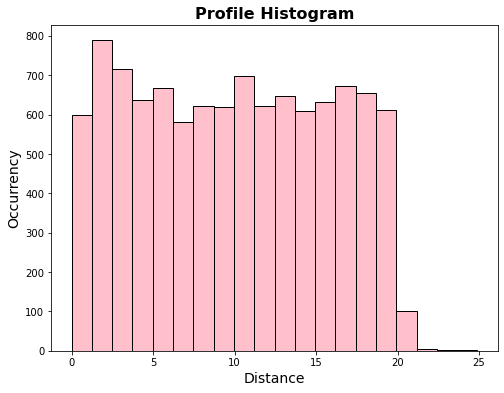

In [198]:
z = plt.figure(figsize = (8, 6))
ax = z.add_subplot(111)
ax.hist(data['distances'], bins, color = 'pink', edgecolor = "black")
ax.set_title('Profile Histogram', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Distance', fontsize = 14)
ax.set_ylabel('Occurrency', fontsize = 14)

plt.show()

In [199]:
# filling the NumPy array 'x'

_, bins = np.histogram(cleaned_dataframe['distances'], bins, range = [0,20])
x = 0.5 * (bins[1:] + bins[:-1])


# filling the NumPy array 'y'

y = np.array([cleaned_dataframe.loc[(cleaned_dataframe['distances'] >= bins[i]) & (cleaned_dataframe['distances'] < bins[i+1])]['residuals'].mean() for i in range(len(bins)-1)])


# filling the NumPy array 'erry'

erry = np.array([cleaned_dataframe.loc[(cleaned_dataframe['distances'] >= bins[i]) & (cleaned_dataframe['distances'] < bins[i+1])]['residuals'].std() for i in range(len(bins)-1)])

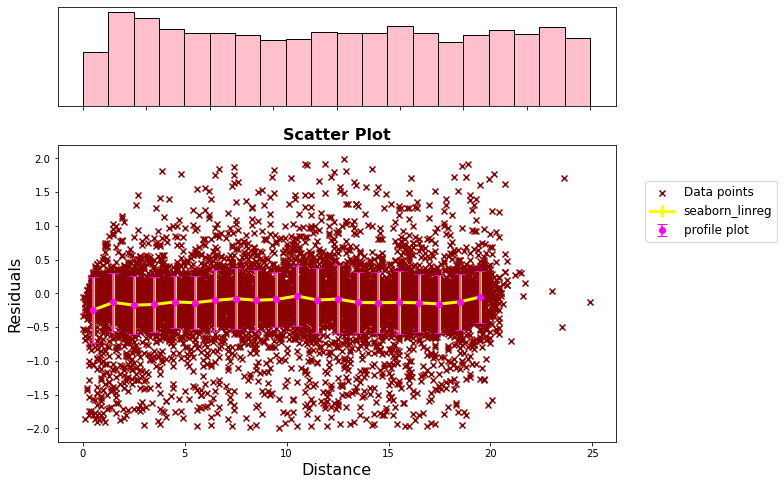

In [205]:
# plotting the profile plot

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8), gridspec_kw = {'height_ratios': [1, 3]})

ax1.hist(cleaned_dataframe['distances'], bins, color = 'pink', edgecolor = "black")
ax1.set_yticks([])
ax1.get_xaxis().set_ticklabels([])

ax2.scatter(cleaned_dataframe['distances'], cleaned_dataframe['residuals'], color = 'darkred', marker = 'x', label = 'Data points')
ax2.errorbar(x, y, erry, color = 'yellow', linewidth = 3, label = 'seaborn_linreg')
ax2.errorbar(x = x, y = y, yerr = erry, fmt = 'o', color = 'magenta', capsize = 5, label = 'profile plot')
ax2.set_xlabel('Distance', fontsize = 16)
ax2.set_ylabel('Residuals', fontsize = 16)

ax2.set_title('Scatter Plot', fontsize = 16, fontweight = 'bold')
ax2.legend(fontsize = 12, bbox_to_anchor = (1.3, 0.9))
plt.show()
